#### Import & dataset

In [77]:
import pandas as pd 
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

from catboost import CatBoostClassifier, Pool
from sklearn.model_selection import train_test_split


In [4]:
import kagglehub

path = kagglehub.dataset_download("juice0lover/users-vs-bots-classification")

print(path)

C:\Users\Anechka\.cache\kagglehub\datasets\juice0lover\users-vs-bots-classification\versions\3


In [44]:
df = pd.read_csv(path + '\\bots_vs_users.csv')

#### Nans

In [45]:
df = df.replace('Unknown', np.nan)
df

,has_domain,has_birth_date,has_photo,can_post_on_wall,can_send_message,has_website,gender,has_short_name,has_first_name,has_last_name,...,ads_ratio,avg_views,posting_frequency_days,phone_numbers_ratio,avg_text_uniqueness,city,has_occupation,occupation_type_university,occupation_type_work,has_personal_data
0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5869,1.0,1.0,1.0,0.0,0.0,NaN,2.0,1.0,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,Saint Petersburg,1.0,0.0,1.0,NaN
5870,1.0,NaN,1.0,0.0,0.0,NaN,1.0,1.0,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,Saint Petersburg,1.0,1.0,0.0,NaN
5871,1.0,1.0,0.0,0.0,0.0,1.0,2.0,1.0,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,Saint Petersburg,1.0,1.0,0.0,NaN
5872,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,Moscow,1.0,0.0,1.0,NaN


In [46]:
df = df.loc[:, df.isna().mean() <= 0.5]
selected_features = df.columns.tolist()
#X_test = X_test[selected_features]
df

,has_domain,has_birth_date,has_photo,can_post_on_wall,can_send_message,has_website,gender,has_short_name,has_first_name,has_last_name,...,has_nickname,has_mobile,all_posts_visible,audio_available,can_add_as_friend,can_invite_to_group,is_blacklisted,is_verified,is_confirmed,city
0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5869,1.0,1.0,1.0,0.0,0.0,NaN,2.0,1.0,1.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Saint Petersburg
5870,1.0,NaN,1.0,0.0,0.0,NaN,1.0,1.0,1.0,1.0,...,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,Saint Petersburg
5871,1.0,1.0,0.0,0.0,0.0,1.0,2.0,1.0,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Saint Petersburg
5872,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,Moscow


In [47]:
(df.isna().sum() / len(df) * 100).sort_values(ascending=False)

city                        47.327205
has_nickname                43.513790
is_confirmed                43.513790
is_verified                 43.513790
is_blacklisted              43.513790
can_invite_to_group         43.513790
can_add_as_friend           43.513790
audio_available             43.513790
all_posts_visible           43.513790
has_mobile                  43.513790
has_birth_date              14.572693
has_website                 12.631937
has_domain                   0.408580
access_to_closed_profile     0.408580
has_last_name                0.408580
has_first_name               0.408580
has_short_name               0.408580
gender                       0.408580
can_send_message             0.408580
can_post_on_wall             0.408580
has_photo                    0.408580
is_profile_closed            0.408580
target                       0.000000
dtype: float64

#### Target encoding for NaNs

In [48]:
df = df.apply(lambda col: col.fillna(df['target']) if col.name != 'target' else col)
df

,has_domain,has_birth_date,has_photo,can_post_on_wall,can_send_message,has_website,gender,has_short_name,has_first_name,has_last_name,...,has_nickname,has_mobile,all_posts_visible,audio_available,can_add_as_friend,can_invite_to_group,is_blacklisted,is_verified,is_confirmed,city
0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,...,1,1,1,1,1,1,1,1,1,1
1,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,...,1,1,1,1,1,1,1,1,1,1
2,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,...,1,1,1,1,1,1,1,1,1,1
3,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,...,1,1,1,1,1,1,1,1,1,1
4,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,...,1,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5869,1.0,1.0,1.0,0.0,0.0,0,2.0,1.0,1.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Saint Petersburg
5870,1.0,0,1.0,0.0,0.0,0,1.0,1.0,1.0,1.0,...,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,Saint Petersburg
5871,1.0,1.0,0.0,0.0,0.0,1.0,2.0,1.0,1.0,1.0,...,0,0,0,0,0,0,0,0,0,Saint Petersburg
5872,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,Moscow


#### Corr heatmap

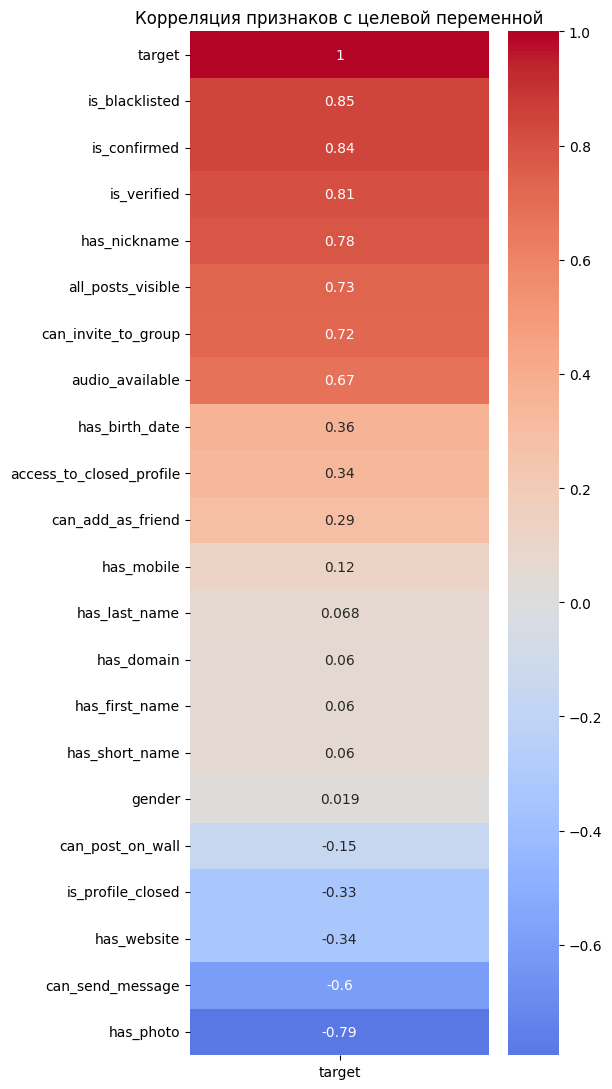

In [69]:
corr = df.corr(numeric_only=True)
target_corr = corr[['target']].sort_values(by='target', ascending=False)
plt.figure(figsize=(6, len(target_corr) * 0.5))
sns.heatmap(target_corr, annot=True, cmap='coolwarm', center=0)

plt.title("Корреляция признаков с целевой переменной")
plt.tight_layout()
plt.show()


#### To_numeric

In [49]:
for col in df.columns:
    converted = pd.to_numeric(df[col], errors='coerce')
    if not converted.isna().any():
        df[col] = converted
df

,has_domain,has_birth_date,has_photo,can_post_on_wall,can_send_message,has_website,gender,has_short_name,has_first_name,has_last_name,...,has_nickname,has_mobile,all_posts_visible,audio_available,can_add_as_friend,can_invite_to_group,is_blacklisted,is_verified,is_confirmed,city
0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1
1,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1
2,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1
3,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1
4,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5869,1.0,1.0,1.0,0.0,0.0,0.0,2.0,1.0,1.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Saint Petersburg
5870,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,...,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,Saint Petersburg
5871,1.0,1.0,0.0,0.0,0.0,1.0,2.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Saint Petersburg
5872,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,Moscow


In [ ]:
df.select_dtypes(include='object').columns[0].split()


['city']

In [63]:
df[df.select_dtypes(include='object').columns[0]] = df[df.select_dtypes(include='object').columns[0]].astype('category')

#### сейчас не пользовалась но, по сути, пайплайн преперинга данных

In [65]:
def prepare_train(df):
    df = df.replace('Unknown', np.nan)
    df = df.loc[:, df.isna().mean() <= 0.5]
    df = df.apply(lambda col: col.fillna(df['target']) if col.name != 'target' else col)
    for col in df.columns:
        converted = pd.to_numeric(df[col], errors='coerce')
        if not converted.isna().any():
            df[col] = converted
    cat_cols = df.select_dtypes(include='object').columns[0]
    df[cat_cols] = df[cat_cols].astype('category')
    return df, cat_cols  

#### Model (Catboost)

In [66]:
X = df.drop('target', axis=1)
y = df['target']

In [67]:
y.value_counts()

target
1    2937
0    2937
Name: count, dtype: int64

In [86]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y  
)

In [110]:
model = CatBoostClassifier(
    iterations=100,
    eval_metric='Accuracy',  
    verbose=0
)

model.fit(
    X_train, y_train,
    eval_set=[(X_test, y_test)],
    cat_features=['city'],
    use_best_model=False,
    verbose=0
)

evals_result = model.evals_result_

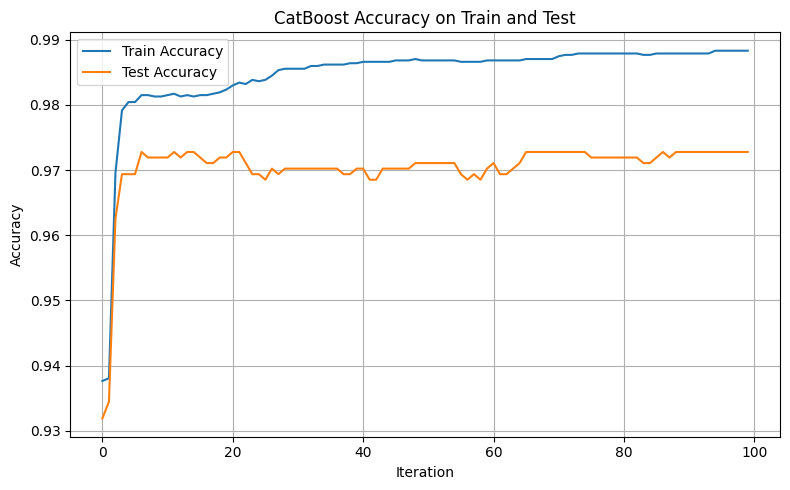

In [111]:
plt.figure(figsize=(8, 5))
plt.plot(evals_result['learn']['Accuracy'], label='Train Accuracy')
plt.plot(evals_result['validation']['Accuracy'], label='Test Accuracy')
plt.xlabel('Iteration')
plt.ylabel('Accuracy')
plt.title('CatBoost Accuracy on Train and Test')
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()


In [112]:
y_pred = model.predict(X_test)

In [113]:
accuracy = y_pred.sum() / y_test.sum()
print(f"accuracy is ', {accuracy:.4f}")

accuracy is ', 0.9796
